# Projeto Final

### Ironhack - Data Analytics Bootcamp

### Pablo Ramon Cardozo Sivila

## Índice:

[Objetivo](#Objetivo) <br>
[Analisando as caracteristicas do Dataset](#Analisando-as-caracteristicas-do-Dataset) <br>
[A expansão do futebol internacional: 1872-2019](#A-expansão-do-futebol-internacional:-1872-2019) <br>
[Analisando os números de seleções em partidas internacionais.](#Analisando-os-números-de-seleções-em-partidas-internacionais.) <br>
[Performance I : Considerando todas as partidas](#Performance-I-:-Considerando-todas-as-partidas) <br>
[Performance II : Considerando apenas os torneios relevantes](#Performance-II-:-Considerando-apenas-os-torneios-relevantes) <br>
[Performance III : Considerando apenas competições importantes com seu devido peso.](#Performance-III-:-Considerando-apenas-competições-importantes-com-seu-devido-peso.) <br>
[Rivalidades](#Rivalidades) <br>
[Conclusão](#Conclusão) <br>

## Objetivo:

O futebol internacional praticado entre seleções de diferentes países, atingiu nos dias de hoje niveis de importancia
diplomatica. O esporte mais popular do mundo tem mais filiados em sua federação interncional (FIFA) que a própria ONU.
Queremos por meio deste trabalho entender através da história, a popularização da pratica de futebol internacional desde
a consolidação de suas regras na segunda metade do séc XIX. Entender que países tiveram seleções com melhor performance
no decorrer das décadas. E finalmente analisar o retrospecto das maiores rivalidades do futebol mundial.
Para isso utilizamos um dataset com todas as partidas oficiais jogadas pelas seleções masculinas principais de cada país.

## Analisando as caracteristicas do Dataset.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('results.csv')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
data.corr() #corelation

,home_score,away_score,neutral
home_score,1.000000,-0.135921,-0.032086
away_score,-0.135921,1.000000,0.084924
neutral,-0.032086,0.084924,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 9 columns):
date          41540 non-null object
home_team     41540 non-null object
away_team     41540 non-null object
home_score    41540 non-null int64
away_score    41540 non-null int64
tournament    41540 non-null object
city          41540 non-null object
country       41540 non-null object
neutral       41540 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [7]:
data.shape

(41540, 9)

In [8]:
data.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## A expansão do futebol internacional: 1872-2019

In [9]:
# Associando um numero para cada partida já realizada
data.rename_axis('match number', inplace = True)

In [10]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
match number,,,,,,,,,
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
import matplotlib.pyplot as plt

In [12]:
# Criando uma nova coluna de data do jogo, agora não mais como object, e sim no formato datetime64 para aplicar funções
pd.to_datetime(data['date']).head()

match number
0   1872-11-30
1   1873-03-08
2   1874-03-07
3   1875-03-06
4   1876-03-04
Name: date, dtype: datetime64[ns]

In [13]:
data['date_time'] = pd.to_datetime(data['date'])

In [14]:
data.dtypes

date                  object
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
date_time     datetime64[ns]
dtype: object

In [15]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time
match number,,,,,,,,,,
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873-03-08
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875-03-06
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04


In [16]:
## Podemos observar que as primeiras partidas entre seleções ocorreram entre Inglaterra e Escócia.
## O que faz muito sentido, já que o futebol foi inventado na ilha britanica, e essas eram as únicas seleções.

In [17]:
# Anos com mais numeros de partidas internacionais.
data['date_time'].dt.year.value_counts().head()

2019    1133
2008    1091
2011    1081
2004    1064
2000    1026
Name: date_time, dtype: int64

In [18]:
data['date_time'].dt.year.value_counts().sort_index().head()

1872    1
1873    1
1874    1
1875    1
1876    2
Name: date_time, dtype: int64

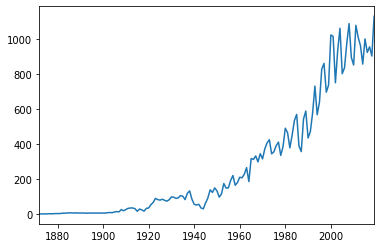

In [19]:
# PLotando para entender visualmente o crescimento do numero de partidas a cada ano da origem do futebol até os dias atuais
data['date_time'].dt.year.value_counts().sort_index().plot()

In [20]:
## Podemos perceber pelo gráfico do número de partidas internacionais a popularização do futebol ao redor do mundo.
## É interessante notar o crescimento relaciconando com a história do século XX.
## Há umm crescimento significativo no período Entreguerras, de 1920 a 1938
## E é visivel um decrescimo no numero de partidas na primeira metade da decada de 40 por conta da Segunda Guerra Mundial.
## A partir da segunda guerra mundial o futebol se dissemina para todos os cantos do mundo.
## Principalmente a partir da década de 80, quando Joao Havelange, entao presidente da FIFA, fomenta o futebol na Africa e Asia.

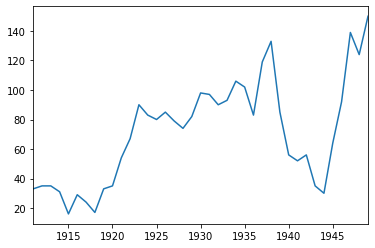

In [21]:
# Crescimento no Período Entreguerras
data['date_time'].dt.year[(data['date_time'].dt.year > 1910) & (data['date_time'].dt.year < 1950)].value_counts().sort_index().plot()

In [22]:
#Por não utilizar mais a coluna Date como object, resolvi deleta-la
del data['date']
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time
match number,,,,,,,,,
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30
1,England,Scotland,4,2,Friendly,London,England,False,1873-03-08
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07
3,England,Scotland,2,2,Friendly,London,England,False,1875-03-06
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04


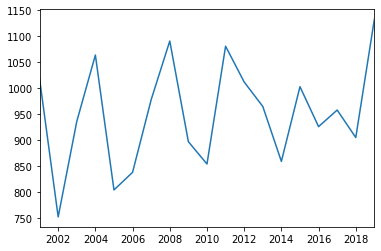

In [23]:
## Pode se perceber que, no sex XXI, o ano com menos partidas internacionais são em maioria os anos de Copa do Mundo.
## Muito por conta das eliminatórias continentais produzirem o maior numero de jogos em todas as Confederações.
## Seguindo uma tendencia que já vinha do final das duas últimas decadas do sec XX.

data['date_time'].dt.year[data['date_time'].dt.year >= 2001].value_counts().sort_index().plot()

In [24]:
# Numero de jogos por ano no Séc XX
data['date_time'].dt.year[data['date_time'].dt.year >= 2001].value_counts().sort_index()

2001    1018
2002     752
2003     936
2004    1064
2005     804
2006     838
2007     978
2008    1091
2009     897
2010     854
2011    1081
2012    1012
2013     965
2014     859
2015    1003
2016     926
2017     958
2018     905
2019    1133
Name: date_time, dtype: int64

In [25]:
# Apenas para mostrar qual a ultima atualizaçao do Dataset
data['date_time'].max()

Timestamp('2019-11-19 00:00:00')

## Analisando os números de seleções em partidas internacionais.

In [26]:
# Criando uma função para identificar o vencedor da partida
def winner(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row ['home_score'] < row ['away_score']:
        return row['away_team']
    else:
        return 'Draw'

In [27]:
# Aplicando a função lambda para criar uma nova coluna com o vencedor
data['winner'] = data.apply(lambda row: winner(row), axis = 1)
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner
match number,,,,,,,,,,
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30,Draw
1,England,Scotland,4,2,Friendly,London,England,False,1873-03-08,England
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07,Scotland
3,England,Scotland,2,2,Friendly,London,England,False,1875-03-06,Draw
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04,Scotland


In [28]:
#  Criando uma função para identificar o perdedor da partida
def loser(row):
    if row['home_score'] < row['away_score']:
        return row['home_team']
    elif row ['home_score'] > row ['away_score']:
        return row['away_team']
    else:
        return 'Draw'

In [29]:
# Aplicando a função lambda para criar uma nova coluna com o perdedor
data['loser'] = data.apply(lambda row: loser(row), axis = 1)
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30,Draw,Draw
1,England,Scotland,4,2,Friendly,London,England,False,1873-03-08,England,Scotland
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07,Scotland,England
3,England,Scotland,2,2,Friendly,London,England,False,1875-03-06,Draw,Draw
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04,Scotland,England


In [30]:
# Na variavel Winners podemos ver quem mais venceu partidas internacionais
winners = pd.value_counts(data.winner)
winners

Draw                             9574
Brazil                            625
England                           572
Germany                           555
Argentina                         526
Sweden                            498
South Korea                       451
Mexico                            439
Hungary                           434
Italy                             423
France                            417
Spain                             406
Netherlands                       398
Uruguay                           382
Scotland                          371
Denmark                           356
Russia                            356
Poland                            351
Belgium                           333
Zambia                            328
Austria                           323
Egypt                             310
Romania                           305
Japan                             300
Portugal                          296
United States                     293
Norway      

In [31]:
# Dropamos os Empates pois não tem relevancia para esta variavel
winners = winners.drop('Draw')
winners

Brazil                           625
England                          572
Germany                          555
Argentina                        526
Sweden                           498
South Korea                      451
Mexico                           439
Hungary                          434
Italy                            423
France                           417
Spain                            406
Netherlands                      398
Uruguay                          382
Scotland                         371
Denmark                          356
Russia                           356
Poland                           351
Belgium                          333
Zambia                           328
Austria                          323
Egypt                            310
Romania                          305
Japan                            300
Portugal                         296
United States                    293
Norway                           293
Saudi Arabia                     290
C

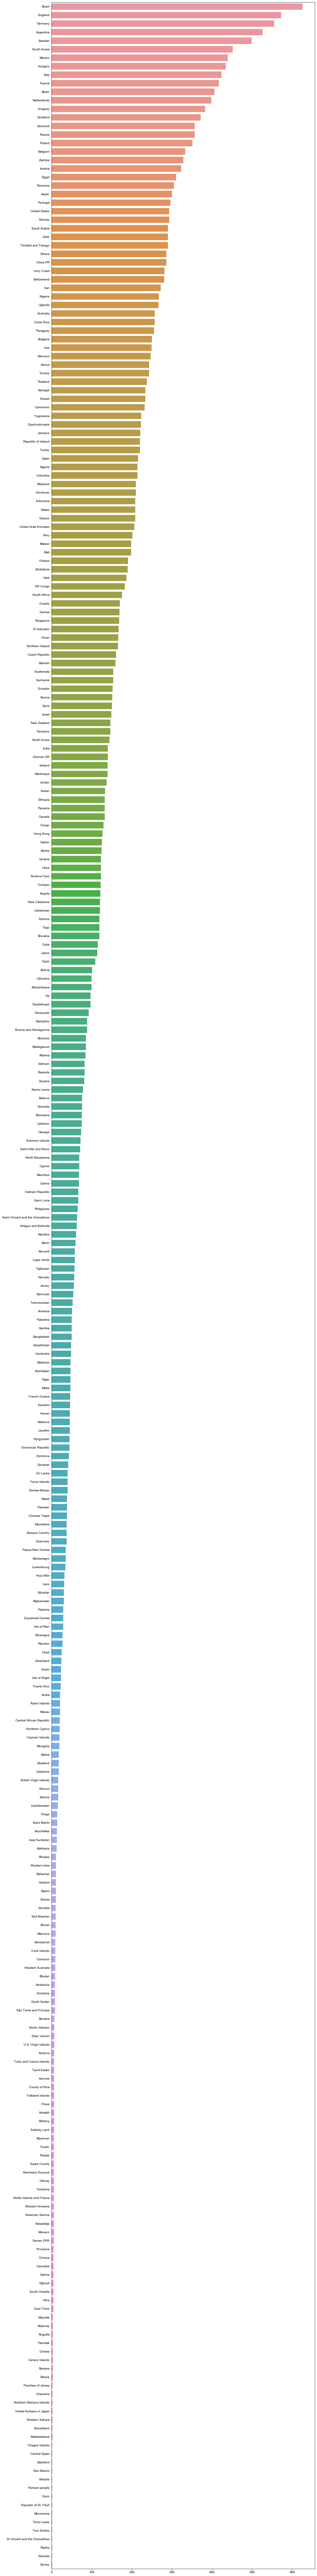

In [32]:
# Plotamos num grafico de barras para melhor visualizar
# Brasil é o que tem mais vitórias!
# Inglaterra, apesar de ser um time de segundo escalão nos dias de hoje, se mantem em segundo por praticar futebol desde o inicio.

fig, ax = plt.subplots(figsize = (15, 150))
sns.set(font_scale = 1)
sns.barplot(y = winners.index.tolist(), x = winners.tolist())

In [33]:
# Criand uma variavel 'loser' parra ver as equipes que mais perderam
# Incrivelmente a Finlandia é o país que mais perdeu na história do futebol com uma margem grande para o segundo!!
losers = pd.value_counts(data.loser)
losers = losers.drop('Draw')
losers.head(20)

Finland             400
Switzerland         344
Northern Ireland    332
Norway              328
Luxembourg          317
Chile               310
Wales               307
Sweden              293
Hungary             292
Uruguay             286
Austria             285
Malta               283
Singapore           280
Paraguay            273
Belgium             271
Peru                270
Denmark             268
Poland              258
Bulgaria            255
Thailand            254
Name: loser, dtype: int64

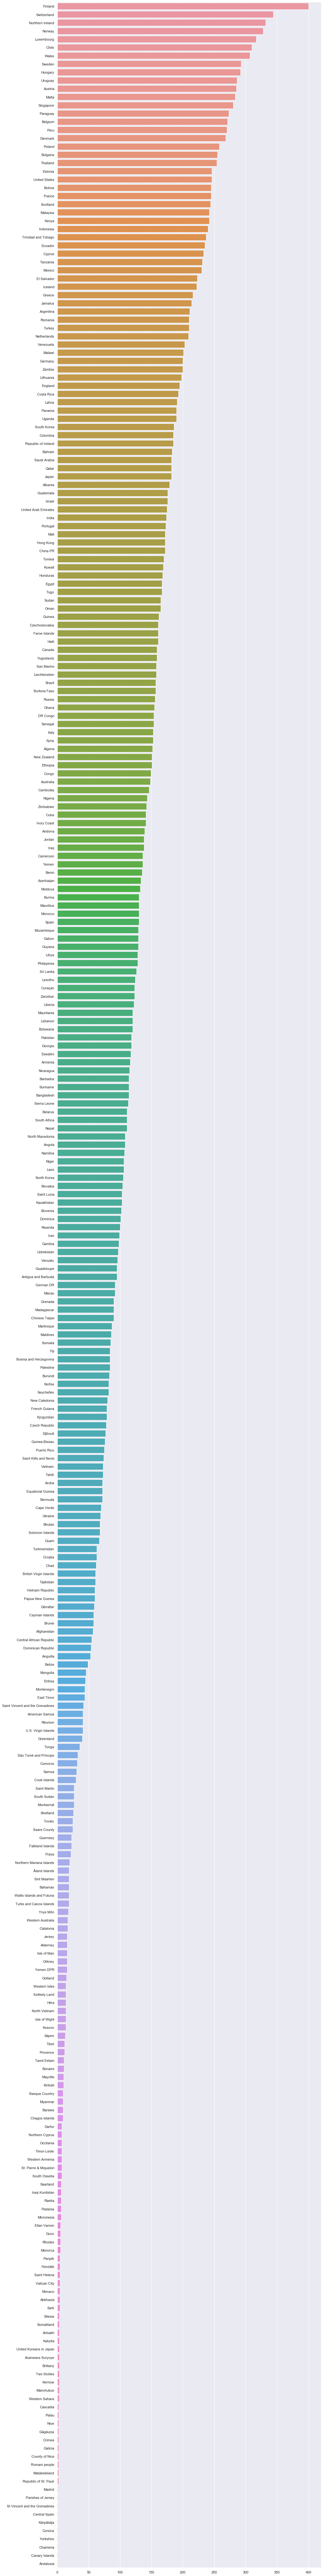

In [34]:
# Plotando podemos ver essa margem.
fig, ax = plt.subplots(figsize = (15, 150))
sns.set(font_scale = 2)
sns.barplot(y = losers.index.tolist(), x = losers.tolist())

In [35]:
# Vamos tentar saber agora quais as equipes que mais fizeram gols na história.
# Criamos uma variavel Score nos baseando no index da variavel 'winner'
score = pd.Series(index = winners.index, dtype = 'int32')
score

Brazil                           0
England                          0
Germany                          0
Argentina                        0
Sweden                           0
South Korea                      0
Mexico                           0
Hungary                          0
Italy                            0
France                           0
Spain                            0
Netherlands                      0
Uruguay                          0
Scotland                         0
Denmark                          0
Russia                           0
Poland                           0
Belgium                          0
Zambia                           0
Austria                          0
Egypt                            0
Romania                          0
Japan                            0
Portugal                         0
United States                    0
Norway                           0
Saudi Arabia                     0
Chile                            0
Trinidad and Tobago 

In [36]:
# Eis os resultados após aplicar um 'for' somando os gols de cada seleçao quando aparecem como 'home team' e 'away team'
for team in score.index:
    score[team] = data[data['home_team'] == team].home_score.sum() + data[data['away_team'] == team].away_score.sum()
score   

Brazil                           2149
England                          2208
Germany                          2124
Argentina                        1830
Sweden                           2013
South Korea                      1508
Mexico                           1514
Hungary                          1886
Italy                            1369
France                           1493
Spain                            1400
Netherlands                      1618
Uruguay                          1391
Scotland                         1352
Denmark                          1416
Russia                           1199
Poland                           1371
Belgium                          1356
Zambia                           1121
Austria                          1382
Egypt                            1022
Romania                          1135
Japan                            1098
Portugal                         1032
United States                     993
Norway                           1209
Saudi Arabia

In [37]:
# Agora os times que mais levaram gols
# Aplicam-se os mesmos parametros apenas invertendo-se a lógica.
defense = pd.Series(index = winners.index, dtype = 'int32')
defense

Brazil                           0
England                          0
Germany                          0
Argentina                        0
Sweden                           0
South Korea                      0
Mexico                           0
Hungary                          0
Italy                            0
France                           0
Spain                            0
Netherlands                      0
Uruguay                          0
Scotland                         0
Denmark                          0
Russia                           0
Poland                           0
Belgium                          0
Zambia                           0
Austria                          0
Egypt                            0
Romania                          0
Japan                            0
Portugal                         0
United States                    0
Norway                           0
Saudi Arabia                     0
Chile                            0
Trinidad and Tobago 

In [38]:
# Eis os resultados do numero de gols que cada seleção ja sofreu
for team in defense.index:
    defense[team] = data[data['home_team'] == team].away_score.sum() + data[data['away_team'] == team].home_score.sum()
defense   

Brazil                            893
England                           994
Germany                          1094
Argentina                        1026
Sweden                           1305
South Korea                       777
Mexico                            935
Hungary                          1386
Italy                             775
France                           1100
Spain                             626
Netherlands                       970
Uruguay                          1111
Scotland                          965
Denmark                          1103
Russia                            668
Poland                           1098
Belgium                          1194
Zambia                            737
Austria                          1215
Egypt                             641
Romania                           887
Japan                             719
Portugal                          711
United States                     912
Norway                           1335
Saudi Arabia

In [39]:
# Aqui colocamos em ordem as seleções que mais fizeram gol em toda historia.
score = score.sort_values(ascending = False)
score

England                          2208
Brazil                           2149
Germany                          2124
Sweden                           2013
Hungary                          1886
Argentina                        1830
Netherlands                      1618
Mexico                           1514
South Korea                      1508
France                           1493
Denmark                          1416
Spain                            1400
Uruguay                          1391
Austria                          1382
Poland                           1371
Italy                            1369
Belgium                          1356
Scotland                         1352
Norway                           1209
Russia                           1199
Switzerland                      1164
Trinidad and Tobago              1136
Romania                          1135
Zambia                           1121
Japan                            1098
Chile                            1081
China PR    

In [40]:
# Nesse caso podemos avaliar tambem que seleções levaram o menor  numero de gols.
# E incrivelmente o Brasil é o que menos gols levou, mesmo com um dos maiores numeros de partidas já feitas.
defense = defense.sort_values(ascending = True)
defense.tail(30)

Brazil               893
United States        912
Malta                918
Malaysia             921
Indonesia            928
Mexico               935
Scotland             965
Netherlands          970
England              994
Bulgaria             998
Thailand            1003
Argentina           1026
Singapore           1028
Paraguay            1032
Wales               1080
Germany             1094
Luxembourg          1096
Chile               1098
Poland              1098
France              1100
Denmark             1103
Uruguay             1111
Belgium             1194
Austria             1215
Northern Ireland    1218
Sweden              1305
Norway              1335
Switzerland         1339
Hungary             1386
Finland             1563
dtype: int32

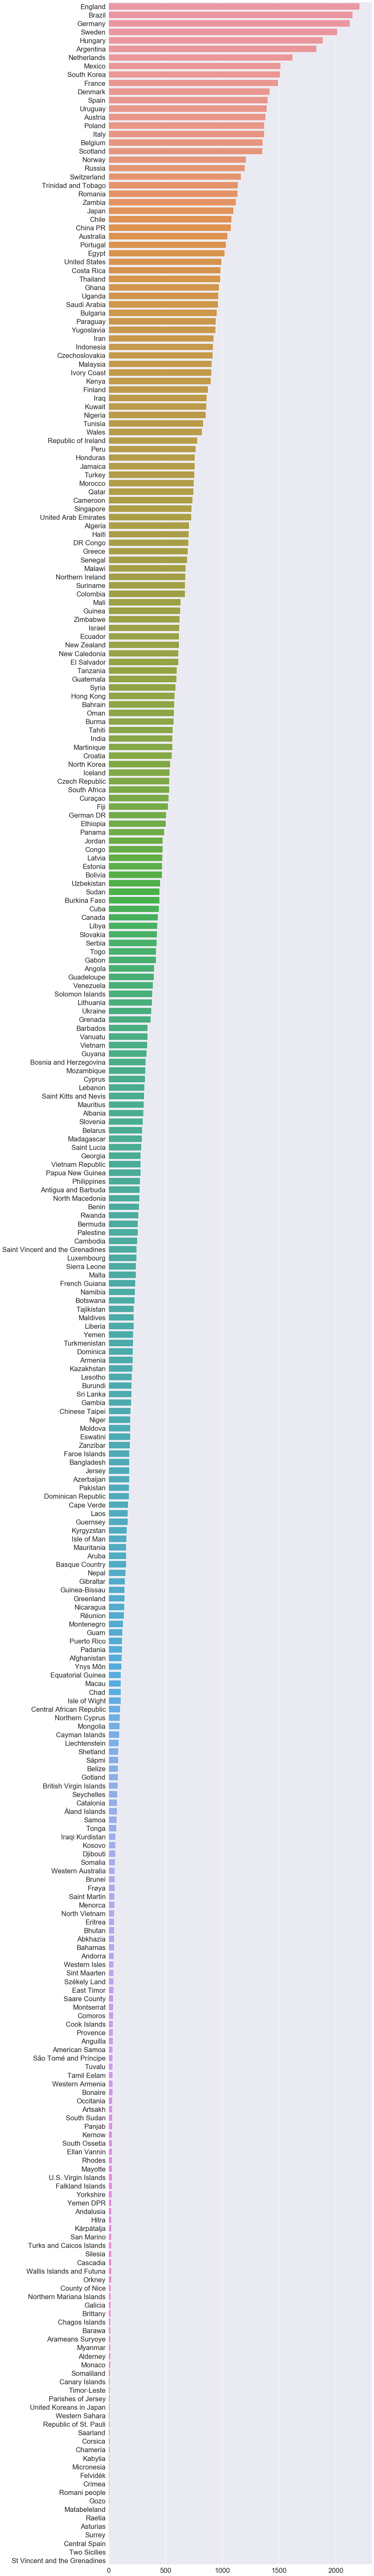

In [41]:
# Voltando a falar das equipes que mais fizeram gols. A Inglaterra vem na liderança seguida de perto por Brasil e Alemanha.
fig, ax = plt.subplots(figsize = (15, 150))
sns.set(font_scale = 2)
sns.barplot(y = score.index.tolist(), x = score.tolist())

## Performance I : Considerando todas as partidas

In [42]:
# Vamos ver a performance dos melhores times em toda a historia do futebol criando um novo DF
performance = pd.DataFrame(columns=winners.index, index=['wins', 'draws', 'loses', 'total'], dtype='float64')
for team in score.index:
    performance[team]['wins'] = len(data[data.winner == team])
    performance[team]['draws'] = len(data[data.home_team == team]) + len(data[data.away_team == team]) - (len(data[data.winner == team]) + len(data[data.loser == team]))
    performance[team]['loses'] = len(data[data.loser == team])
    performance[team]['total'] = len(data[data.home_team == team]) + len(data[data.away_team == team])
performance.head()

,Brazil,England,Germany,Argentina,Sweden,South Korea,Mexico,Hungary,Italy,France,...,Romani people,Gozo,Republic of St. Pauli,Micronesia,Timor-Leste,Two Sicilies,St Vincent and the Grenadines,Raetia,Asturias,Surrey
wins,625.0,572.0,555.0,526.0,498.0,451.0,439.0,434.0,423.0,417.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
draws,199.0,242.0,194.0,243.0,225.0,222.0,200.0,202.0,224.0,178.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
loses,157.0,195.0,200.0,211.0,293.0,186.0,230.0,292.0,153.0,245.0,...,2.0,5.0,2.0,6.0,7.0,3.0,1.0,6.0,0.0,0.0
total,981.0,1009.0,949.0,980.0,1016.0,859.0,869.0,928.0,800.0,840.0,...,3.0,6.0,4.0,7.0,9.0,4.0,3.0,8.0,1.0,1.0


In [43]:
# Colocando em valores de porcentagem, vamos analisar a melhor performance por vitória.
performance.drop("total",inplace=True)
for percentage in performance.columns.tolist():
    performance[percentage] /= performance[percentage].sum()
    
performance = performance.sort_values(by = 'wins', axis = 1, ascending = False)
performance.head()

,Surrey,Asturias,Canary Islands,Yorkshire,Padania,Jersey,Parishes of Jersey,County of Nice,Basque Country,Brazil,...,Somalia,Chagos Islands,Luxembourg,Northern Mariana Islands,East Timor,Liechtenstein,Anguilla,Djibouti,Andorra,San Marino
wins,1.0,1.0,0.75,0.714286,0.674419,0.670732,0.666667,0.666667,0.649123,0.637105,...,0.093458,0.090909,0.084577,0.083333,0.078431,0.075758,0.049180,0.045455,0.036585,0.006135
draws,0.0,0.0,0.00,0.142857,0.186047,0.134146,0.000000,0.111111,0.192982,0.202854,...,0.112150,0.090909,0.126866,0.083333,0.058824,0.126263,0.081967,0.079545,0.115854,0.024540
loses,0.0,0.0,0.25,0.142857,0.139535,0.195122,0.333333,0.222222,0.157895,0.160041,...,0.794393,0.818182,0.788557,0.833333,0.862745,0.797980,0.868852,0.875000,0.847561,0.969325


In [44]:
# Percebe-se países bem pequenos liderando. Isso se deve a esses países terem realizado muito poucos jogos.
# Uma visão bem distorcida.

## Performance II : Considerando apenas os torneios relevantes

### Agora se apenas considerassemos os torneios mais relevantes pela FIFA. Já que esses são os de maiores relevancia e que mais pontos dão no Ranking da Fifa.

https://en.wikipedia.org/wiki/FIFA_World_Rankings

In [45]:
import urllib3

In [46]:
html = pd.read_html('https://en.wikipedia.org/wiki/Continental_football_championships')
html

[    0                                                  1
 0 NaN  This article needs additional citations for ve...,
        Continent Confederation           Championship  Founded  Teams  \
 0           Asia           AFC              Asian Cup     1956     24   
 1         Africa           CAF  Africa Cup of Nations     1957     24   
 2  South America      CONMEBOL           Copa América     1916     12   
 3  North America      CONCACAF               Gold Cup     1963     16   
 4        Oceania           OFC            Nations Cup     1973      8   
 5         Europe          UEFA  European Championship     1960     24   
 
               Most titles  
 0               Japan (4)  
 1               Egypt (7)  
 2            Uruguay (15)  
 3             Mexico (11)  
 4         New Zealand (5)  
 5  Germany Spain (3 each)  ,
      Year   CONMEBOL           CAF           AFC          OFC       CONCACAF  \
 0    1916    Uruguay           NaN           NaN          NaN            NaN 

In [47]:
html[1]

,Continent,Confederation,Championship,Founded,Teams,Most titles
0,Asia,AFC,Asian Cup,1956,24,Japan (4)
1,Africa,CAF,Africa Cup of Nations,1957,24,Egypt (7)
2,South America,CONMEBOL,Copa América,1916,12,Uruguay (15)
3,North America,CONCACAF,Gold Cup,1963,16,Mexico (11)
4,Oceania,OFC,Nations Cup,1973,8,New Zealand (5)
5,Europe,UEFA,European Championship,1960,24,Germany Spain (3 each)


In [48]:
# Seguindo os dados da Wikipedia, esses são os torneios continentais junto da Copa do Mundo.
# Torneios de maior relevancia internacional entre seleções segundo a FIFA

In [49]:
# Vamos criar um dataset apenas com as partidas desses torneios
fifa_cups = data.loc[(data['tournament'] == 'FIFA World Cup') | (data['tournament'] == 'Copa América') |
         (data['tournament'] == 'UEFA Euro') | (data['tournament'] == 'Gold Cup') |
         (data['tournament'] == 'AFC Asian Cup') | (data['tournament'] == 'African Cup of Nations') |
         (data['tournament'] == 'Oceania Nations Cup') ]
fifa_cups

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
431,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916-07-02,Uruguay,Chile
433,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,1916-07-06,Argentina,Chile
434,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,1916-07-08,Draw,Draw
435,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,1916-07-10,Draw,Draw
437,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,1916-07-12,Uruguay,Brazil
439,Argentina,Uruguay,0,0,Copa América,Avellaneda,Argentina,False,1916-07-17,Draw,Draw
464,Uruguay,Chile,4,0,Copa América,Montevideo,Uruguay,False,1917-09-30,Uruguay,Chile
465,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True,1917-10-03,Argentina,Brazil
466,Argentina,Chile,1,0,Copa América,Montevideo,Uruguay,True,1917-10-06,Argentina,Chile


In [50]:
#Vamos ver que seleções mais venceram nesses torneios.

In [51]:
# Seguimos a mesma lógica da performance de vitorias, derrotas, gols marcados e gols sofridos.
fifa_winners = pd.value_counts(fifa_cups.winner)
fifa_winners = fifa_winners.drop('Draw')
fifa_winners

Brazil                    184
Argentina                 165
Uruguay                   134
Germany                    93
Mexico                     88
Chile                      77
United States              74
Paraguay                   70
Peru                       61
Italy                      61
Colombia                   59
Ghana                      58
Egypt                      57
Nigeria                    57
France                     54
Spain                      49
Cameroon                   45
Ivory Coast                45
Netherlands                44
Iran                       43
South Korea                42
England                    39
Japan                      35
Australia                  34
Portugal                   32
Costa Rica                 31
Russia                     31
Algeria                    31
Belgium                    27
Senegal                    26
                         ... 
Norway                      3
Libya                       3
India     

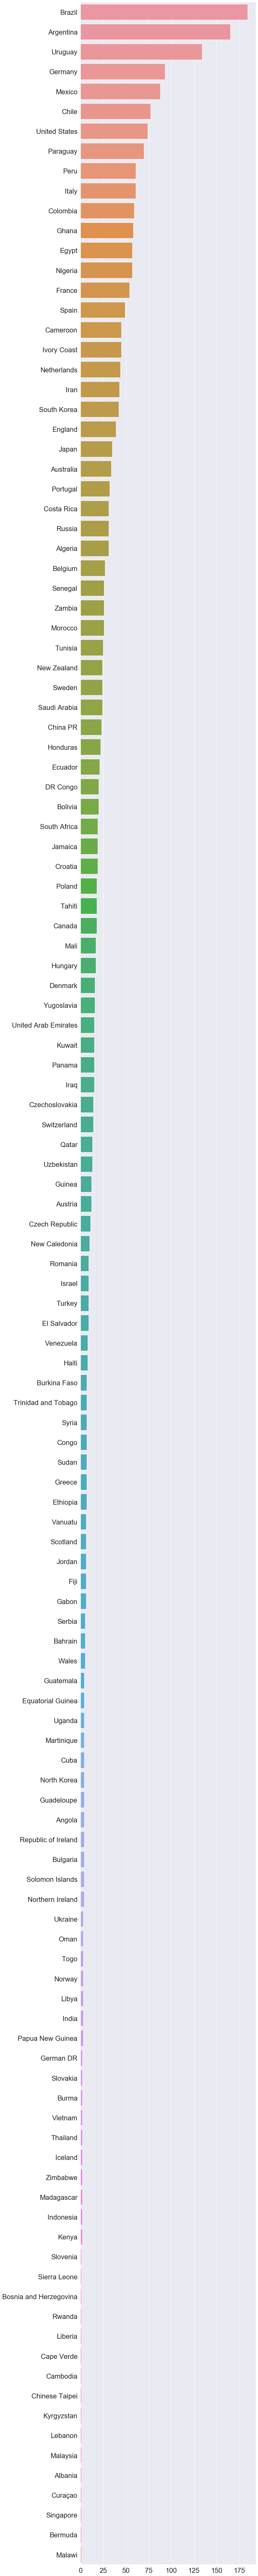

In [52]:
# Pode-se perceber na plotagem Brasil, Argentina e Uruguay liderando. Apesar de serem as maiores forças do continente sulamericano,
# isso se deve muito pela Copa America ter sido criada em 1916. Muito antes de outros torneios continentais.
fig, ax = plt.subplots(figsize = (10, 150))
sns.set(font_scale = 1)
sns.barplot(y = fifa_winners.index.tolist(), x = fifa_winners.tolist())

In [53]:
fifa_losers = pd.value_counts(data.loser)
fifa_losers = fifa_losers.drop('Draw')
fifa_losers.head(20)

Finland             400
Switzerland         344
Northern Ireland    332
Norway              328
Luxembourg          317
Chile               310
Wales               307
Sweden              293
Hungary             292
Uruguay             286
Austria             285
Malta               283
Singapore           280
Paraguay            273
Belgium             271
Peru                270
Denmark             268
Poland              258
Bulgaria            255
Thailand            254
Name: loser, dtype: int64

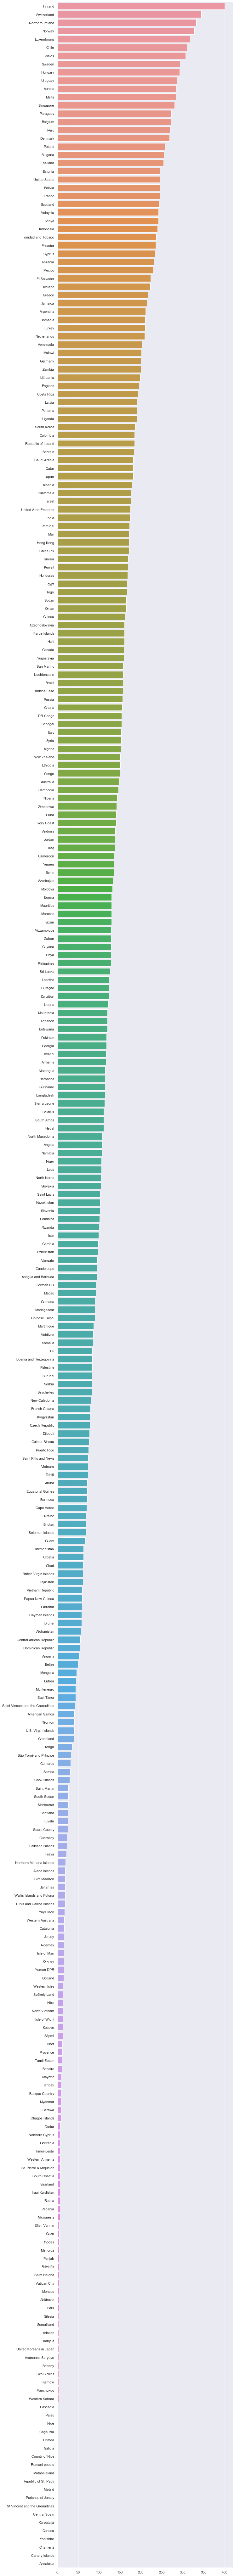

In [54]:
# Novamente a Finlandia liderando o ranking infeliz dos maiores perdedores. Agora apenas das competíções importantes.
fig, ax = plt.subplots(figsize = (10, 150))
sns.set(font_scale = 1)
sns.barplot(y = fifa_losers.index.tolist(), x = fifa_losers.tolist())

In [55]:
fifa_score = pd.Series(index = fifa_winners.index, dtype = 'int32')
fifa_score

Brazil                    0
Argentina                 0
Uruguay                   0
Germany                   0
Mexico                    0
Chile                     0
United States             0
Paraguay                  0
Peru                      0
Italy                     0
Colombia                  0
Ghana                     0
Egypt                     0
Nigeria                   0
France                    0
Spain                     0
Cameroon                  0
Ivory Coast               0
Netherlands               0
Iran                      0
South Korea               0
England                   0
Japan                     0
Australia                 0
Portugal                  0
Costa Rica                0
Russia                    0
Algeria                   0
Belgium                   0
Senegal                   0
                         ..
Norway                    0
Libya                     0
India                     0
Papua New Guinea          0
German DR           

In [56]:
# Aqui seguimos os passos para saber as seleções que mais fizeram gols nas competiçoes da Fifa
for squad in fifa_score.index:
    fifa_score[squad] = fifa_cups[fifa_cups['home_team'] == squad].home_score.sum() + fifa_cups[fifa_cups['away_team'] == squad].away_score.sum()
fifa_score   

Brazil                    669
Argentina                 599
Uruguay                   493
Germany                   298
Mexico                    297
Chile                     333
United States             217
Paraguay                  291
Peru                      248
Italy                     167
Colombia                  183
Ghana                     143
Egypt                     169
Nigeria                   157
France                    182
Spain                     154
Cameroon                  141
Ivory Coast               151
Netherlands               143
Iran                      140
South Korea               145
England                   131
Japan                     118
Australia                 174
Portugal                   98
Costa Rica                126
Russia                    115
Algeria                   106
Belgium                    90
Senegal                    80
                         ... 
Norway                      8
Libya                      12
India     

In [57]:
# Brasil novamente em primeiro.
fifa_score = fifa_score.sort_values(ascending = False)
fifa_score

Brazil                    669
Argentina                 599
Uruguay                   493
Chile                     333
Germany                   298
Mexico                    297
Paraguay                  291
Peru                      248
United States             217
Colombia                  183
France                    182
Australia                 174
Egypt                     169
Italy                     167
Nigeria                   157
Spain                     154
Ivory Coast               151
South Korea               145
Ecuador                   144
Netherlands               143
Ghana                     143
Cameroon                  141
Iran                      140
England                   131
Costa Rica                126
Japan                     118
Russia                    115
Bolivia                   107
Tunisia                   106
Algeria                   106
                         ... 
Libya                      12
India                      12
Kenya     

In [58]:
# Fazendo uma analise de performance para as competiçoes de maiores importancia, replicamos a formula apenas adicionando
# o 'total'  de partidas para comprovar a acurácia dos dados.

performance_fifa = pd.DataFrame(columns=fifa_winners.index, index=['wins', 'draws', 'loses', 'total'], dtype='float64')
for squad in fifa_score.index:
    performance_fifa[squad]['wins'] = len(fifa_cups[fifa_cups.winner == squad])
    performance_fifa[squad]['draws'] = len(fifa_cups[fifa_cups.home_team == squad]) + len(fifa_cups[fifa_cups.away_team == squad]) - (len(fifa_cups[fifa_cups.winner == squad]) + len(fifa_cups[fifa_cups.loser == squad]))
    performance_fifa[squad]['loses'] = len(fifa_cups[fifa_cups.loser == squad])
    performance_fifa[squad]['total'] = len(fifa_cups[fifa_cups.home_team == squad]) + len(fifa_cups[fifa_cups.away_team == squad])   
    
performance_fifa.head()

,Brazil,Argentina,Uruguay,Germany,Mexico,Chile,United States,Paraguay,Peru,Italy,...,Cambodia,Chinese Taipei,Kyrgyzstan,Lebanon,Malaysia,Albania,Curaçao,Singapore,Bermuda,Malawi
wins,184.0,165.0,134.0,93.0,88.0,77.0,74.0,70.0,61.0,61.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
draws,57.0,55.0,48.0,32.0,38.0,41.0,17.0,54.0,42.0,37.0,...,1.0,2.0,0.0,2.0,3.0,0.0,1.0,1.0,0.0,1.0
loses,66.0,56.0,75.0,33.0,52.0,100.0,39.0,77.0,73.0,23.0,...,3.0,4.0,3.0,3.0,5.0,2.0,5.0,2.0,2.0,4.0
total,307.0,276.0,257.0,158.0,178.0,218.0,130.0,201.0,176.0,121.0,...,5.0,7.0,4.0,6.0,9.0,3.0,7.0,4.0,3.0,6.0


In [59]:
# E chegamos neste resultado porcentualmente aplicando um 'for'
performance_fifa.drop("total",inplace=True)
for percentage in performance_fifa.columns.tolist():
    performance_fifa[percentage] /= performance_fifa[percentage].sum()
    
performance_fifa = performance_fifa.sort_values(by = 'wins', axis = 1, ascending = False)
performance_fifa.head()

,New Zealand,Brazil,Argentina,Germany,United States,Australia,Tahiti,Israel,Egypt,Ghana,...,Angola,Cuba,Guatemala,Bulgaria,Venezuela,Kenya,Malaysia,Slovenia,Togo,Thailand
wins,0.615385,0.599349,0.597826,0.588608,0.569231,0.566667,0.56250,0.5625,0.53271,0.522523,...,0.137931,0.133333,0.133333,0.12500,0.121212,0.117647,0.111111,0.111111,0.107143,0.083333
draws,0.179487,0.185668,0.199275,0.202532,0.130769,0.150000,0.09375,0.1250,0.17757,0.207207,...,0.482759,0.100000,0.266667,0.28125,0.227273,0.235294,0.333333,0.333333,0.285714,0.375000
loses,0.205128,0.214984,0.202899,0.208861,0.300000,0.283333,0.34375,0.3125,0.28972,0.270270,...,0.379310,0.766667,0.600000,0.59375,0.651515,0.647059,0.555556,0.555556,0.607143,0.541667


In [60]:
# Mais condizente com a realidade, porem com a "Nova Zelandia" a frente do Brasil.

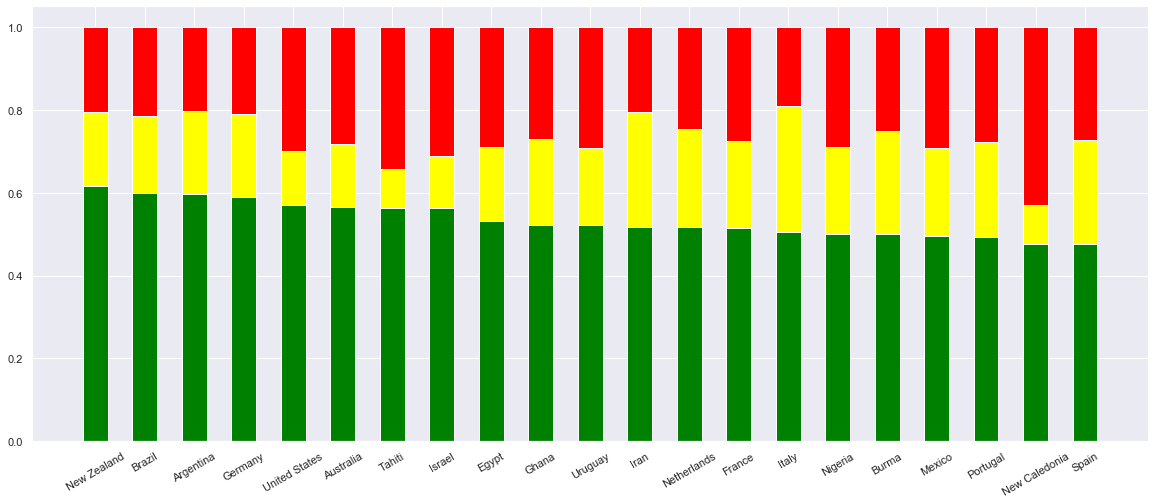

In [61]:
# Plotando num grafico de barras com vitorias, empates e derrotas. Chegamos nesta visualização, ordenada por vitorias

import numpy as np


fig, ax = plt.subplots(1,1, figsize=(20, 8))
performance_fifa_20 = performance_fifa.loc[:, performance_fifa.columns[0]:performance_fifa.columns[20]]
y_offset = np.zeros(len(performance_fifa_20.columns))
index = np.arange(len(performance_fifa_20.columns))
colors = ['green', 'yellow', 'red']
plt.xticks(index, performance_fifa_20.columns, rotation=30)
for i, row in enumerate(performance_fifa_20.index.tolist()):
    plt.bar(index, performance_fifa_20.loc[row], bottom=y_offset, color=colors[i], width=0.5)
    y_offset = y_offset + performance_fifa_20.loc[row]

In [62]:
# Nova Zelandia seria o time com melhor desempenho se considerarmos a maiores competições da FIFA!
# Claro que isso se deve ao fato da Nova Zelandia ser a melhor, e talvez a única, seleção da OFC que seja competitiva.
# Australia se desfiliou da OFC e se uniu à Federação Asiatica por querer jogar com seleçoes com melhor nivel futebolistico.
# Deixando a Nova Zelandia disputando com seleções de países em que o futebol é quase que totalmente amador, como Tahiti e Fiji.


https://web.archive.org/web/20131019173305/http://vff.org.vn/news/pdf/fifa-approves-australia-move-650.pdf

## Performance III : Considerando apenas competições importantes com seu devido peso.

In [63]:
## Vamos dar os devidos pesos para as Competições para sermos mais justos.
## Copa do Mundo: 6; EuroCopa: 4; Copa América: 4; Copa da Africa: 3; Copa da Asia: 3; Copa Ouro: 3; OFC Nations Cup: 1

In [64]:
fifa_cups

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
431,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916-07-02,Uruguay,Chile
433,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,1916-07-06,Argentina,Chile
434,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,1916-07-08,Draw,Draw
435,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,1916-07-10,Draw,Draw
437,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,1916-07-12,Uruguay,Brazil
439,Argentina,Uruguay,0,0,Copa América,Avellaneda,Argentina,False,1916-07-17,Draw,Draw
464,Uruguay,Chile,4,0,Copa América,Montevideo,Uruguay,False,1917-09-30,Uruguay,Chile
465,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True,1917-10-03,Argentina,Brazil
466,Argentina,Chile,1,0,Copa América,Montevideo,Uruguay,True,1917-10-06,Argentina,Chile


In [65]:
# Criando uma função para o peso de cada Torneio seguindo minha própria avaliação de importancia e dificuldade dos
# torneios, baseado nos meus conhecimentos de futebol.
def weight(row):
    if row['tournament'] == 'FIFA World Cup':
        return int(6)
    elif row['tournament'] == 'Copa América':
        return int(4)
    elif row['tournament'] == 'UEFA Euro':
        return int(5)
    elif row['tournament'] == 'Gold Cup':
        return int(3)
    elif row['tournament'] == 'AFC Asian Cup':
        return int(3)
    elif row['tournament'] == 'African Cup of Nations':
        return int(3)
    else:
        return int(1)

In [66]:
# E criando uma nova coluna com o devido peso para cada partida
fifa_cups['weight'] = fifa_cups.apply(lambda row: weight(row), axis = 1)
fifa_cups

C:\Users\Pablo Sivila\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser,weight
match number,,,,,,,,,,,,
431,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916-07-02,Uruguay,Chile,4
433,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,1916-07-06,Argentina,Chile,4
434,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,1916-07-08,Draw,Draw,4
435,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,1916-07-10,Draw,Draw,4
437,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,1916-07-12,Uruguay,Brazil,4
439,Argentina,Uruguay,0,0,Copa América,Avellaneda,Argentina,False,1916-07-17,Draw,Draw,4
464,Uruguay,Chile,4,0,Copa América,Montevideo,Uruguay,False,1917-09-30,Uruguay,Chile,4
465,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True,1917-10-03,Argentina,Brazil,4
466,Argentina,Chile,1,0,Copa América,Montevideo,Uruguay,True,1917-10-06,Argentina,Chile,4


In [67]:
fifa_cups[fifa_cups.tournament == 'FIFA World Cup'].weight.unique()

array([6], dtype=int64)

In [68]:
# Fazemos uma nova analise de performance, agora dividida por competição e peso

new_performance = pd.DataFrame(columns=fifa_winners.index, index=['wins world cup', 'wins copa america', 
                                                                  'wins euro', 'wins africa', 'wins asia', 'wins gold cup',
                                                                  'wins oceania', 'draw world cup', 'draw copa america',
                                                                  'draw euro', 'draw africa', 'draw asia', 'draw gold cup',
                                                                  'draw oceania', 'loses world cup', 'loses copa america',
                                                                  'loses euro', 'loses africa', 'loses asia', 'loses gold cup',
                                                                  'loses oceania'], dtype='float64')

In [69]:
# Aplicando esse código, as vitorias, derrotas e empates terão seu devido peso.
for squad in fifa_score.index:
    new_performance[squad]['wins world cup'] = len(fifa_cups[(fifa_cups.winner == squad) & (fifa_cups.tournament == 'FIFA World Cup')])*fifa_cups[fifa_cups.tournament == 'FIFA World Cup'].weight.unique()
    new_performance[squad]['wins copa america'] = len(fifa_cups[(fifa_cups.winner == squad) & (fifa_cups.tournament == 'Copa América')])*fifa_cups[fifa_cups.tournament == 'Copa América'].weight.unique()
    new_performance[squad]['wins euro'] = len(fifa_cups[(fifa_cups.winner == squad) & (fifa_cups.tournament == 'UEFA Euro')])*fifa_cups[fifa_cups.tournament == 'UEFA Euro'].weight.unique()
    new_performance[squad]['wins africa'] = len(fifa_cups[(fifa_cups.winner == squad) & (fifa_cups.tournament == 'African Cup of Nations')])*fifa_cups[fifa_cups.tournament == 'African Cup of Nations'].weight.unique()
    new_performance[squad]['wins asia'] = len(fifa_cups[(fifa_cups.winner == squad) & (fifa_cups.tournament == 'AFC Asian Cup')])*fifa_cups[fifa_cups.tournament == 'AFC Asian Cup'].weight.unique()
    new_performance[squad]['wins gold cup'] = len(fifa_cups[(fifa_cups.winner == squad) & (fifa_cups.tournament == 'Gold Cup')])*fifa_cups[fifa_cups.tournament == 'Gold Cup'].weight.unique()
    new_performance[squad]['wins oceania'] = len(fifa_cups[(fifa_cups.winner == squad) & (fifa_cups.tournament == 'Oceania Nations Cup')])*fifa_cups[fifa_cups.tournament == 'Oceania Nations Cup'].weight.unique()
    

In [70]:
for squad in fifa_score.index:
    new_performance[squad]['draw world cup'] = (len(fifa_cups[(fifa_cups.home_team == squad)& (fifa_cups.tournament == 'FIFA World Cup')]) + len(fifa_cups[(fifa_cups.away_team == squad) & (fifa_cups.tournament == 'FIFA World Cup')]) - (len(fifa_cups[(fifa_cups.winner == squad)& (fifa_cups.tournament == 'FIFA World Cup')]) + len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'FIFA World Cup')])))*fifa_cups[fifa_cups.tournament == 'FIFA World Cup'].weight.unique()
    new_performance[squad]['draw copa america'] = (len(fifa_cups[(fifa_cups.home_team == squad)& (fifa_cups.tournament == 'Copa América')]) + len(fifa_cups[(fifa_cups.away_team == squad) & (fifa_cups.tournament == 'Copa América')]) - (len(fifa_cups[(fifa_cups.winner == squad)& (fifa_cups.tournament == 'Copa América')]) + len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'Copa América')])))*fifa_cups[fifa_cups.tournament == 'Copa América'].weight.unique()
    new_performance[squad]['draw euro'] = (len(fifa_cups[(fifa_cups.home_team == squad)& (fifa_cups.tournament == 'UEFA Euro')]) + len(fifa_cups[(fifa_cups.away_team == squad) & (fifa_cups.tournament == 'UEFA Euro')]) - (len(fifa_cups[(fifa_cups.winner == squad)& (fifa_cups.tournament == 'UEFA Euro')]) + len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'UEFA Euro')])))*fifa_cups[fifa_cups.tournament == 'UEFA Euro'].weight.unique()
    new_performance[squad]['draw africa'] = (len(fifa_cups[(fifa_cups.home_team == squad)& (fifa_cups.tournament == 'African Cup of Nations')]) + len(fifa_cups[(fifa_cups.away_team == squad) & (fifa_cups.tournament == 'African Cup of Nations')]) - (len(fifa_cups[(fifa_cups.winner == squad) & (fifa_cups.tournament == 'African Cup of Nations')]) + len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'African Cup of Nations')])))*fifa_cups[fifa_cups.tournament == 'African Cup of Nations'].weight.unique()
    new_performance[squad]['draw asia'] = (len(fifa_cups[(fifa_cups.home_team == squad)& (fifa_cups.tournament == 'AFC Asian Cup')]) + len(fifa_cups[(fifa_cups.away_team == squad) & (fifa_cups.tournament == 'AFC Asian Cup')]) - (len(fifa_cups[(fifa_cups.winner == squad)& (fifa_cups.tournament == 'AFC Asian Cup')]) + len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'AFC Asian Cup')])))*fifa_cups[fifa_cups.tournament == 'AFC Asian Cup'].weight.unique()
    new_performance[squad]['draw gold cup'] = (len(fifa_cups[(fifa_cups.home_team == squad)& (fifa_cups.tournament == 'Gold Cup')]) + len(fifa_cups[(fifa_cups.away_team == squad) & (fifa_cups.tournament == 'Gold Cup')]) - (len(fifa_cups[(fifa_cups.winner == squad) & (fifa_cups.tournament == 'Gold Cup')]) + len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'Gold Cup')])))*fifa_cups[fifa_cups.tournament == 'Gold Cup'].weight.unique()
    new_performance[squad]['draw oceania'] = (len(fifa_cups[(fifa_cups.home_team == squad)& (fifa_cups.tournament == 'Oceania Nations Cup')]) + len(fifa_cups[(fifa_cups.away_team == squad) & (fifa_cups.tournament == 'Oceania Nations Cup')]) - (len(fifa_cups[(fifa_cups.winner == squad)& (fifa_cups.tournament == 'Oceania Nations Cup')]) + len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'Oceania Nations Cup')])))*fifa_cups[fifa_cups.tournament == 'Oceania Nations Cup'].weight.unique()
    

In [71]:
for squad in fifa_score.index:
    new_performance[squad]['loses world cup'] = len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'FIFA World Cup')])*fifa_cups[fifa_cups.tournament == 'FIFA World Cup'].weight.unique()
    new_performance[squad]['loses copa america'] = len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'Copa América')])*fifa_cups[fifa_cups.tournament == 'Copa América'].weight.unique()
    new_performance[squad]['loses euro'] = len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'UEFA Euro')])*fifa_cups[fifa_cups.tournament == 'UEFA Euro'].weight.unique()
    new_performance[squad]['loses africa'] = len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'African Cup of Nations')])*fifa_cups[fifa_cups.tournament == 'African Cup of Nations'].weight.unique()
    new_performance[squad]['loses asia'] = len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'AFC Asian Cup')])*fifa_cups[fifa_cups.tournament == 'AFC Asian Cup'].weight.unique()
    new_performance[squad]['loses gold cup'] = len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'Gold Cup')])*fifa_cups[fifa_cups.tournament == 'Gold Cup'].weight.unique()
    new_performance[squad]['loses oceania'] = len(fifa_cups[(fifa_cups.loser == squad) & (fifa_cups.tournament == 'Oceania Nations Cup')])*fifa_cups[fifa_cups.tournament == 'Oceania Nations Cup'].weight.unique()
    

In [72]:
# Dataframe novo aberto por competição e com pontuação de vitorias, derrrotas e empates com seu devido peso
new_performance

,Brazil,Argentina,Uruguay,Germany,Mexico,Chile,United States,Paraguay,Peru,Italy,...,Cambodia,Chinese Taipei,Kyrgyzstan,Lebanon,Malaysia,Albania,Curaçao,Singapore,Bermuda,Malawi
wins world cup,438.0,258.0,144.0,402.0,96.0,66.0,48.0,42.0,30.0,270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wins copa america,412.0,488.0,440.0,0.0,76.0,264.0,20.0,252.0,220.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wins euro,0.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,80.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
wins africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
wins asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0
wins gold cup,24.0,0.0,0.0,0.0,159.0,0.0,183.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
wins oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
draw world cup,108.0,90.0,72.0,120.0,84.0,42.0,36.0,60.0,18.0,126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
draw copa america,148.0,160.0,144.0,0.0,52.0,136.0,8.0,176.0,152.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
draw euro,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# Criando novas linhas com a soma dos pontos de vitorias, empates e derrotas
new_performance = new_performance.append(new_performance.iloc[0:7].sum().rename('total win points'))
new_performance = new_performance.append(new_performance.iloc[7:14].sum().rename('total draw points'))
new_performance = new_performance.append(new_performance.iloc[14:21].sum().rename('total lose points'))
new_performance

,Brazil,Argentina,Uruguay,Germany,Mexico,Chile,United States,Paraguay,Peru,Italy,...,Cambodia,Chinese Taipei,Kyrgyzstan,Lebanon,Malaysia,Albania,Curaçao,Singapore,Bermuda,Malawi
wins world cup,438.0,258.0,144.0,402.0,96.0,66.0,48.0,42.0,30.0,270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wins copa america,412.0,488.0,440.0,0.0,76.0,264.0,20.0,252.0,220.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wins euro,0.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,80.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
wins africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
wins asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0
wins gold cup,24.0,0.0,0.0,0.0,159.0,0.0,183.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
wins oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
draw world cup,108.0,90.0,72.0,120.0,84.0,42.0,36.0,60.0,18.0,126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
draw copa america,148.0,160.0,144.0,0.0,52.0,136.0,8.0,176.0,152.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
draw euro,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# DataFrame final com a soma das pontuações
final_stat = new_performance.iloc[21:]
final_stat

,Brazil,Argentina,Uruguay,Germany,Mexico,Chile,United States,Paraguay,Peru,Italy,...,Cambodia,Chinese Taipei,Kyrgyzstan,Lebanon,Malaysia,Albania,Curaçao,Singapore,Bermuda,Malawi
total win points,874.0,746.0,584.0,532.0,331.0,330.0,251.0,294.0,253.0,350.0,...,3.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0
total draw points,262.0,250.0,216.0,180.0,169.0,178.0,71.0,236.0,173.0,206.0,...,3.0,6.0,0.0,6.0,9.0,0.0,3.0,3.0,0.0,3.0
total lose points,296.0,270.0,340.0,187.0,253.0,430.0,185.0,328.0,310.0,132.0,...,9.0,12.0,9.0,9.0,15.0,10.0,15.0,6.0,6.0,12.0


In [75]:
# Perfomance de cada equipe nova com os pesos por competição organizado no numero de vitorias.
for percent in final_stat.columns.tolist():
    final_stat[percent] /= final_stat[percent].sum()
    
final_stat = final_stat.sort_values(by = 'total win points', axis = 1, ascending = False)
final_stat.iloc[:, : 20]

C:\Users\Pablo Sivila\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Brazil,Germany,Argentina,Tahiti,Netherlands,France,Uruguay,Italy,Ghana,Burma,Egypt,United States,Portugal,New Caledonia,Spain,Israel,Nigeria,Croatia,Uzbekistan,Iran
total win points,0.610335,0.591769,0.589258,0.56250,0.520000,0.514382,0.512281,0.508721,0.504065,0.50,0.500000,0.495069,0.490141,0.476190,0.475779,0.473684,0.466667,0.464912,0.464286,0.459184
total draw points,0.182961,0.200222,0.197472,0.09375,0.235789,0.208122,0.189474,0.299419,0.211382,0.25,0.184211,0.140039,0.228169,0.095238,0.250865,0.210526,0.200000,0.214912,0.142857,0.275510
total lose points,0.206704,0.208009,0.213270,0.34375,0.244211,0.277496,0.298246,0.191860,0.284553,0.25,0.315789,0.364892,0.281690,0.428571,0.273356,0.315789,0.333333,0.320175,0.392857,0.265306


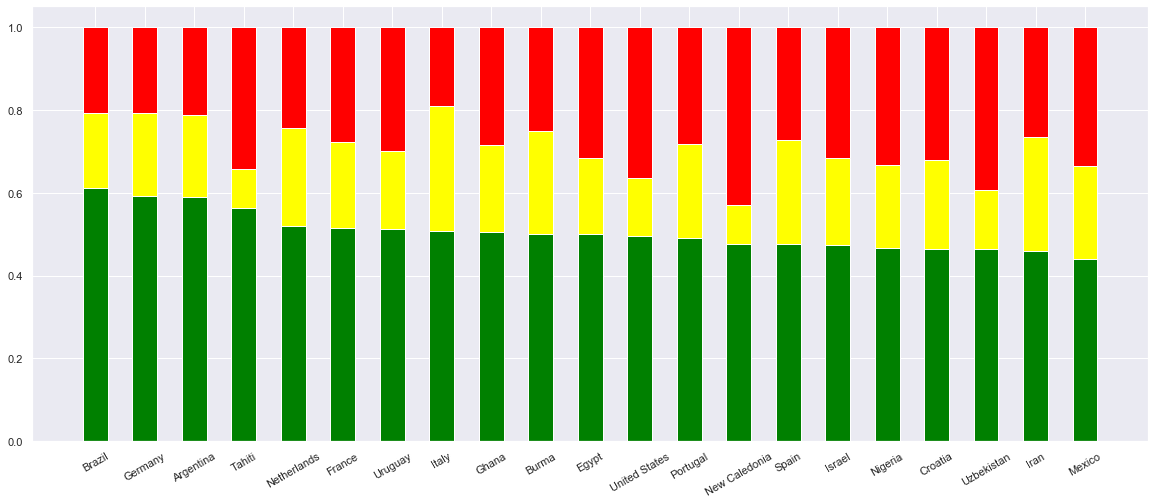

In [76]:
#Resultado Final com os top 20 seleçoes com os melhores desempenho em competiçoes FIFA com seus devidos pesos

fig, ax = plt.subplots(1,1, figsize=(20, 8))
final_stat_20 = final_stat.loc[:, final_stat.columns[0]:final_stat.columns[20]]
y_offset = np.zeros(len(final_stat_20.columns))
index = np.arange(len(final_stat_20.columns))
colors = ['green', 'yellow', 'red']
plt.xticks(index, final_stat_20.columns, rotation=30)
for i, row in enumerate(final_stat_20.index.tolist()):
    plt.bar(index, final_stat_20.loc[row], bottom=y_offset, color=colors[i], width=0.5)
    y_offset = y_offset + final_stat_20.loc[row]

## Rivalidades

### Mesmo com a avaliação fria de performance para sabermos o melhor time da história, o futebol é mais associado com a paixão. E nada melhor que medir esse sentimento do que por meio das rivalidades. 
### Seja por meio de histórico de guerras, incidentes diplomaticos, jogos marcantes, algumas grandes rivalidades se formaram nestes quase dois séculos de futebol.
### Vamos então ver quem se saiu melhor nesses confrontos em toda história não importando o torneio disputado.

#### Brasil x Argentina - O maior classico do mundo

In [77]:
superclassico=[["Brazil","Argentina"]]

rivais=pd.DataFrame()
for i in superclassico:
    rivais = pd.concat([rivais,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
rivais    

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
403,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,1914-09-20,Argentina,Brazil
404,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,1914-09-27,Brazil,Argentina
435,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,1916-07-10,Draw,Draw
465,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True,1917-10-03,Argentina,Brazil
501,Brazil,Argentina,3,1,Copa América,Rio de Janeiro,Brazil,False,1919-05-18,Brazil,Argentina
508,Brazil,Argentina,3,3,Friendly,Rio de Janeiro,Brazil,False,1919-06-01,Draw,Draw
553,Argentina,Brazil,2,0,Copa América,Viña del Mar,Chile,True,1920-09-25,Argentina,Brazil
598,Argentina,Brazil,1,0,Copa América,Buenos Aires,Argentina,False,1921-10-02,Argentina,Brazil
668,Brazil,Argentina,2,0,Copa América,Rio de Janeiro,Brazil,False,1922-10-15,Brazil,Argentina


In [78]:
# Brasil tem uma leve vantagem frente ao seu maior rival!
bra_arg = pd.value_counts(rivais.winner)
bra_arg

Brazil       43
Argentina    37
Draw         24
Name: winner, dtype: int64

#### Argentina x Inglaterra - O clássico das Malvinas

In [79]:
malvinas=[["England","Argentina"]]

beligerantes = pd.DataFrame()
for i in malvinas:
    beligerantes = pd.concat([beligerantes,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
beligerantes  

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
3211,England,Argentina,2,1,Friendly,London,England,False,1951-05-09,England,Argentina
3474,Argentina,England,3,1,Friendly,Buenos Aires,Argentina,False,1953-05-14,Argentina,England
3477,Argentina,England,0,0,Friendly,Buenos Aires,Argentina,False,1953-05-17,Draw,Draw
5126,Argentina,England,1,3,FIFA World Cup,Rancagua,Chile,True,1962-06-02,England,Argentina
5625,Argentina,England,1,0,Friendly,Rio de Janeiro,Brazil,True,1964-06-06,Argentina,England
6226,England,Argentina,1,0,FIFA World Cup,London,England,False,1966-07-23,England,Argentina
8990,England,Argentina,2,2,Friendly,London,England,False,1974-05-22,Draw,Draw
10155,Argentina,England,1,1,Friendly,Buenos Aires,Argentina,False,1977-06-12,Draw,Draw
11224,England,Argentina,3,1,Friendly,London,England,False,1980-05-13,England,Argentina


In [80]:
# Na maior rivalidade intercontinental, ingleses levam a melhor apesar das vitorias historicas dos argentinos nas copas
eng_arg = pd.value_counts(beligerantes.winner)
eng_arg

England      6
Draw         6
Argentina    3
Name: winner, dtype: int64

#### Mexico x EUA - A rivalidade economica

In [81]:
riogrande=[["Mexico","United States"]]

muro = pd.DataFrame()
for i in riogrande:
    muro = pd.concat([muro,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
muro  

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
1677,Mexico,United States,2,4,FIFA World Cup qualification,Rome,Italy,True,1934-05-24,United States,Mexico
2004,Mexico,United States,7,2,Friendly,Mexico City,Mexico,False,1937-09-12,Mexico,United States
2009,Mexico,United States,7,3,Friendly,Mexico City,Mexico,False,1937-09-19,Mexico,United States
2703,Mexico,United States,5,0,NAFU Championship,Havana,Cuba,True,1947-07-13,Mexico,United States
3007,Mexico,United States,6,0,FIFA World Cup qualification,Mexico City,Mexico,False,1949-09-04,Mexico,United States
3015,Mexico,United States,6,2,FIFA World Cup qualification,Mexico City,Mexico,False,1949-09-18,Mexico,United States
3582,Mexico,United States,4,0,FIFA World Cup qualification,Mexico City,Mexico,False,1954-01-10,Mexico,United States
3583,Mexico,United States,3,1,FIFA World Cup qualification,Mexico City,Mexico,False,1954-01-14,Mexico,United States
4117,Mexico,United States,6,0,FIFA World Cup qualification,Mexico City,Mexico,False,1957-04-07,Mexico,United States


In [82]:
# Grande vantagem dos mexicanos, apesar dos americanos terem saido vitoriosos em duelo direto com mexicanos na Copa de 2002
# O inesquecivel 'Dosacero'
mex_eua = pd.value_counts(muro.winner)
mex_eua

Mexico           34
United States    18
Draw             14
Name: winner, dtype: int64

#### Inglaterra x Alemanha - A rivalidade das guerras mundiais

In [83]:
battle=[["England","Germany"]]

dunkirk = pd.DataFrame()
for i in battle:
    dunkirk = pd.concat([dunkirk,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
dunkirk 

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
1278,Germany,England,3,3,Friendly,Berlin,Germany,False,1930-05-10,Draw,Draw
1838,England,Germany,3,0,Friendly,London,England,False,1935-12-04,England,Germany
2078,Germany,England,3,6,Friendly,Berlin,Germany,False,1938-05-14,England,Germany
3721,England,Germany,3,1,Friendly,London,England,False,1954-12-01,England,Germany
3954,Germany,England,1,3,Friendly,Berlin,Germany,False,1956-05-26,England,Germany
5845,Germany,England,0,1,Friendly,Nuremberg,Germany,False,1965-05-12,England,Germany
6061,England,Germany,1,0,Friendly,London,England,False,1966-02-23,England,Germany
6233,England,Germany,4,2,FIFA World Cup,London,England,False,1966-07-30,England,Germany
6785,Germany,England,1,0,Friendly,Hanover,Germany,False,1968-06-01,Germany,England


In [84]:
# Equilibrio total entre germanicos e anglo-saxoes, apesar da vitoria inglesa frente aos alemaes na final da copa de 1966
eng_ger = pd.value_counts(dunkirk.winner)
eng_ger

Germany    13
England    13
Draw        6
Name: winner, dtype: int64

#### Italia x Alemanha - O classico das maiores potencias europeias

In [85]:
eixo=[["Italy","Germany"]]

salo = pd.DataFrame()
for i in eixo:
    salo = pd.concat([salo,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
salo

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
684,Italy,Germany,3,1,Friendly,Milan,Italy,False,1923-01-01,Italy,Germany
852,Germany,Italy,0,1,Friendly,Duisburg,Germany,False,1924-11-23,Italy,Germany
1191,Italy,Germany,1,2,Friendly,Turin,Italy,False,1929-04-28,Germany,Italy
1264,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,False,1930-03-02,Italy,Germany
1541,Italy,Germany,3,1,Friendly,Bologna,Italy,False,1933-01-01,Italy,Germany
1916,Germany,Italy,2,2,Friendly,Berlin,Germany,False,1936-11-15,Draw,Draw
2203,Italy,Germany,3,2,Friendly,Florence,Italy,False,1939-03-26,Italy,Germany
2259,Germany,Italy,5,2,Friendly,Berlin,Germany,False,1939-11-26,Germany,Italy
2289,Italy,Germany,3,2,Friendly,Milan,Italy,False,1940-05-05,Italy,Germany


In [86]:
# Reconhecidamente os maiores carrascos dos alemaes.
ita_ger = pd.value_counts(salo.winner)
ita_ger

Italy      15
Draw       12
Germany     8
Name: winner, dtype: int64

#### França x Alemanha - O clássico da linha Maginot

In [87]:
dumont=[["France","Germany"]]

alsace = pd.DataFrame()
for i in dumont:
    alsace = pd.concat([alsace,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
alsace

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
1368,France,Germany,1,0,Friendly,Colombes,France,False,1931-03-15,France,Germany
1550,Germany,France,3,3,Friendly,Berlin,Germany,False,1933-03-19,Draw,Draw
1755,France,Germany,1,3,Friendly,Paris,France,False,1935-03-17,Germany,France
1952,Germany,France,4,0,Friendly,Stuttgart,Germany,False,1937-03-21,Germany,France
3382,France,Germany,3,1,Friendly,Colombes,France,False,1952-10-05,France,Germany
3704,Germany,France,1,3,Friendly,Hanover,Germany,False,1954-10-16,France,Germany
4386,France,Germany,6,3,FIFA World Cup,Gothenburg,Sweden,True,1958-06-28,France,Germany
4439,France,Germany,2,2,Friendly,Colombes,France,False,1958-10-26,Draw,Draw
5231,Germany,France,2,2,Friendly,Stuttgart,Germany,False,1962-10-24,Draw,Draw


In [88]:
# França leva a melhor apesar das derrotas nas copas frente aos alemaes.
fra_ger = pd.value_counts(alsace.winner)
fra_ger

France     14
Germany     9
Draw        8
Name: winner, dtype: int64

#### Holanda x Alemanha - O clássico da escolas de pensamento

In [89]:
anne = [["Netherlands","Germany"]]

frank = pd.DataFrame()
for i in anne:
    frank = pd.concat([frank,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
frank

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
258,Netherlands,Germany,4,2,Friendly,Arnhem,Netherlands,False,1910-04-24,Netherlands,Germany
270,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False,1910-10-16,Netherlands,Germany
318,Netherlands,Germany,5,5,Friendly,Zwolle,Netherlands,False,1912-03-24,Draw,Draw
338,Germany,Netherlands,2,3,Friendly,Leipzig,Germany,False,1912-11-17,Netherlands,Germany
389,Netherlands,Germany,4,4,Friendly,Amsterdam,Netherlands,False,1914-04-05,Draw,Draw
709,Germany,Netherlands,0,0,Friendly,Hamburg,Germany,False,1923-05-10,Draw,Draw
789,Netherlands,Germany,0,1,Friendly,Amsterdam,Netherlands,False,1924-04-21,Germany,Netherlands
867,Netherlands,Germany,2,1,Friendly,Amsterdam,Netherlands,False,1925-03-29,Netherlands,Germany
953,Germany,Netherlands,4,2,Friendly,Düsseldorf,Germany,False,1926-04-18,Germany,Netherlands


In [90]:
# Alemaes na frente, assim como no resultado da final da copa de 1974
ned_ger = pd.value_counts(frank.winner)
ned_ger

Draw           16
Germany        16
Netherlands    12
Name: winner, dtype: int64

#### Portugal x Espanha - O clássico ibérico

In [91]:
peninsula = [["Portugal","Spain"]]

iberica = pd.DataFrame()
for i in peninsula:
    iberica = pd.concat([iberica,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
iberica

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
615,Spain,Portugal,3,1,Friendly,Madrid,Spain,False,1921-12-18,Spain,Portugal
682,Portugal,Spain,1,2,Friendly,Lisbon,Portugal,False,1922-12-17,Spain,Portugal
772,Spain,Portugal,3,0,Friendly,Seville,Spain,False,1923-12-16,Spain,Portugal
1102,Portugal,Spain,2,2,Friendly,Lisbon,Portugal,False,1928-01-08,Draw,Draw
1181,Spain,Portugal,5,0,Friendly,Seville,Spain,False,1929-03-17,Spain,Portugal
1351,Portugal,Spain,0,1,Friendly,Porto,Portugal,False,1930-11-30,Spain,Portugal
1554,Spain,Portugal,3,0,Friendly,Vigo,Spain,False,1933-04-02,Spain,Portugal
1647,Spain,Portugal,9,0,FIFA World Cup qualification,Madrid,Spain,False,1934-03-11,Spain,Portugal
1652,Portugal,Spain,1,2,FIFA World Cup qualification,Lisbon,Portugal,False,1934-03-18,Spain,Portugal


In [92]:
# Larrga vantagem espanhola, apesar da maioria dos confrontos terem sido realizados antes dos anos 1980
por_spa = pd.value_counts(iberica.winner)
por_spa

Spain       15
Draw        14
Portugal     8
Name: winner, dtype: int64

#### França x Inglaterra - O clássico dos 100 anos

In [93]:
bretagne = [["France","England"]]

cientani = pd.DataFrame()
for i in bretagne:
    cientani = pd.concat([cientani,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
cientani

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
708,France,England,1,4,Friendly,Vincennes,France,False,1923-05-10,England,France
794,France,England,1,3,Friendly,Vincennes,France,False,1924-05-17,England,France
878,France,England,2,3,Friendly,Colombes,France,False,1925-05-21,England,France
1045,France,England,0,6,Friendly,Colombes,France,False,1927-05-26,England,France
1129,France,England,1,5,Friendly,Colombes,France,False,1928-05-17,England,France
1197,France,England,1,4,Friendly,Colombes,France,False,1929-05-09,England,France
1388,France,England,5,2,Friendly,Colombes,France,False,1931-05-14,France,England
1631,England,France,4,1,Friendly,London,England,False,1933-12-06,England,France
2086,France,England,2,4,Friendly,Colombes,France,False,1938-05-26,England,France


In [94]:
# Larga vantagem inglesa, muito pelo grande numero de vitorias antes da decada de 40 
fra_eng = pd.value_counts(cientani.winner)
fra_eng

England    17
France     10
Draw        6
Name: winner, dtype: int64

#### Argentina x Uruguay - O clássico do rio da prata 

In [95]:
plata = [["Argentina","Uruguay"]]

rioplatense = pd.DataFrame()
for i in plata:
    rioplatense = pd.concat([rioplatense,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
rioplatense

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
145,Uruguay,Argentina,0,6,Friendly,Montevideo,Uruguay,False,1902-07-20,Argentina,Uruguay
154,Argentina,Uruguay,2,3,Friendly,Buenos Aires,Argentina,False,1903-09-13,Uruguay,Argentina
175,Argentina,Uruguay,0,0,Copa Lipton,Buenos Aires,Argentina,False,1905-08-15,Draw,Draw
186,Uruguay,Argentina,0,2,Copa Lipton,Montevideo,Uruguay,False,1906-08-15,Argentina,Uruguay
188,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,1906-10-21,Argentina,Uruguay
223,Uruguay,Argentina,2,2,Copa Lipton,Montevideo,Uruguay,False,1908-08-15,Draw,Draw
224,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,1908-09-13,Argentina,Uruguay
225,Argentina,Uruguay,0,1,Copa Premio Honor Argentino,Buenos Aires,Argentina,False,1908-10-04,Uruguay,Argentina
245,Argentina,Uruguay,2,1,Copa Lipton,Buenos Aires,Argentina,False,1909-08-15,Argentina,Uruguay


In [96]:
# Muitos jogos, e grande vantagem argentina a partir dos anos 80
arg_uru = pd.value_counts(rioplatense.winner)
arg_uru

Argentina    81
Uruguay      52
Draw         43
Name: winner, dtype: int64

#### França x Italia - A rivalidade gourmet

In [97]:
latin = [["France","Italy"]]

monaco = pd.DataFrame()
for i in latin:
    monaco = pd.concat([monaco,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
monaco

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
260,Italy,France,6,2,Friendly,Milan,Italy,False,1910-05-15,Italy,France
286,France,Italy,2,2,Friendly,Saint-Ouen,France,False,1911-04-09,Draw,Draw
316,Italy,France,3,4,Friendly,Turin,Italy,False,1912-03-17,France,Italy
342,France,Italy,1,0,Friendly,Saint-Ouen,France,False,1913-01-12,France,Italy
387,Italy,France,2,0,Friendly,Turin,Italy,False,1914-03-29,Italy,France
527,Italy,France,9,4,Friendly,Milan,Italy,False,1920-01-18,Italy,France
563,France,Italy,1,2,Friendly,Marseille,France,False,1921-02-20,Italy,France
863,Italy,France,7,0,Friendly,Turin,Italy,False,1925-03-22,Italy,France
1036,France,Italy,3,3,Friendly,Colombes,France,False,1927-04-24,Draw,Draw


In [98]:
# Novamente a Italia se sobressai perante seus maiores rivais europeus.
fra_ita = pd.value_counts(monaco.winner)
fra_ita

Italy     17
Draw      10
France    10
Name: winner, dtype: int64

#### Holanda x Belgica - O derby dos países baixos

In [99]:
flanders = [["Netherlands","Belgium"]]

ue = pd.DataFrame()
for i in flanders:
    ue = pd.concat([ue,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
ue

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
172,Belgium,Netherlands,1,4,Friendly,Antwerp,Belgium,False,1905-04-30,Netherlands,Belgium
174,Netherlands,Belgium,4,0,Friendly,Rotterdam,Netherlands,False,1905-05-14,Netherlands,Belgium
184,Belgium,Netherlands,5,0,Friendly,Antwerp,Belgium,False,1906-04-29,Belgium,Netherlands
185,Netherlands,Belgium,2,3,Friendly,Rotterdam,Netherlands,False,1906-05-13,Belgium,Netherlands
197,Belgium,Netherlands,1,3,Friendly,Antwerp,Belgium,False,1907-04-14,Netherlands,Belgium
200,Netherlands,Belgium,1,2,Friendly,Haarlem,Netherlands,False,1907-05-09,Belgium,Netherlands
208,Belgium,Netherlands,1,4,Friendly,Antwerp,Belgium,False,1908-03-29,Netherlands,Belgium
214,Netherlands,Belgium,3,1,Friendly,Rotterdam,Netherlands,False,1908-04-26,Netherlands,Belgium
234,Belgium,Netherlands,1,4,Friendly,Antwerp,Belgium,False,1909-03-21,Netherlands,Belgium


In [100]:
# Grande vantagem holandesa por ter se tornado um dos maiores centros do futebol no mundo.
ned_bel = pd.value_counts(ue.winner)
ned_bel

Netherlands    54
Belgium        40
Draw           31
Name: winner, dtype: int64

#### Argentina x Alemanha - O clássico das copas

In [101]:
peron = [["Argentina","Germany"]]

la_cumbrecita = pd.DataFrame()
for i in peron:
    la_cumbrecita = pd.concat([la_cumbrecita,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
la_cumbrecita

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
4352,Argentina,Germany,1,3,FIFA World Cup,Malmö,Sweden,True,1958-06-08,Germany,Argentina
6212,Argentina,Germany,0,0,FIFA World Cup,Birmingham,England,True,1966-07-16,Draw,Draw
8468,Germany,Argentina,2,3,Friendly,Munich,Germany,False,1973-02-14,Argentina,Germany
10144,Argentina,Germany,1,3,Friendly,Buenos Aires,Argentina,False,1977-06-05,Germany,Argentina
10971,Germany,Argentina,2,1,Friendly,Berlin,Germany,False,1979-09-12,Germany,Argentina
11591,Argentina,Germany,2,1,Mundialito,Montevideo,Uruguay,True,1981-01-01,Argentina,Germany
12161,Argentina,Germany,1,1,Friendly,Buenos Aires,Argentina,False,1982-03-24,Draw,Draw
13193,Germany,Argentina,1,3,Friendly,Düsseldorf,Germany,False,1984-09-12,Argentina,Germany
14244,Argentina,Germany,3,2,FIFA World Cup,Mexico City,Mexico,True,1986-06-29,Argentina,Germany


In [102]:
#Vantagem argentina no total, com muitas derrotas em Copas do Mundo.
arg_ger = pd.value_counts(la_cumbrecita.winner)
arg_ger

Argentina    10
Germany       7
Draw          6
Name: winner, dtype: int64

#### Brasil x França - A rivalidade iluminista

In [103]:
crepe = [["Brazil","France"]]

scargot = pd.DataFrame()
for i in crepe:
    scargot = pd.concat([scargot,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
scargot

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
1324,Brazil,France,3,2,Friendly,Rio de Janeiro,Brazil,False,1930-08-01,Brazil,France
4384,Brazil,France,5,2,FIFA World Cup,Solna,Sweden,True,1958-06-24,Brazil,France
5387,France,Brazil,2,3,Friendly,Colombes,France,False,1963-04-28,Brazil,France
10176,Brazil,France,2,2,Friendly,Rio de Janeiro,Brazil,False,1977-06-30,Draw,Draw
10436,France,Brazil,1,0,Friendly,Paris,France,False,1978-04-01,France,Brazil
11759,France,Brazil,1,3,Friendly,Paris,France,False,1981-05-15,Brazil,France
14235,Brazil,France,1,1,FIFA World Cup,Guadalajara,Mexico,True,1986-06-21,Draw,Draw
17110,France,Brazil,0,2,Friendly,Paris,France,False,1992-08-26,Brazil,France
20503,France,Brazil,1,1,Tournoi de France,Lyon,France,False,1997-06-03,Draw,Draw


In [104]:
# Mesmo com a fama de carrasco do Brasil, os franceses perdem no confronto direto.
bra_fra = pd.value_counts(scargot.winner)
bra_fra

Brazil    7
France    5
Draw      4
Name: winner, dtype: int64

#### Brasil x Alemanha - O duelo de titãs

In [105]:
blumenau = [["Brazil","Germany"]]

pomerode = pd.DataFrame()
for i in blumenau:
    pomerode = pd.concat([pomerode,data.loc[(data.home_team.isin(i))&(data.away_team.isin(i))]])
    
pomerode

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_time,winner,loser
match number,,,,,,,,,,,
5392,Germany,Brazil,1,2,Friendly,Hamburg,Germany,False,1963-05-05,Brazil,Germany
5871,Brazil,Germany,2,0,Friendly,Rio de Janeiro,Brazil,False,1965-06-06,Brazil,Germany
6798,Germany,Brazil,2,1,Friendly,Stuttgart,Germany,False,1968-06-16,Germany,Brazil
6987,Brazil,Germany,2,2,Friendly,Rio de Janeiro,Brazil,False,1968-12-14,Draw,Draw
8625,Germany,Brazil,0,1,Friendly,Berlin,Germany,False,1973-06-16,Brazil,Germany
10157,Brazil,Germany,1,1,Friendly,Rio de Janeiro,Brazil,False,1977-06-12,Draw,Draw
10441,Germany,Brazil,0,1,Friendly,Hamburg,Germany,False,1978-04-05,Brazil,Germany
11596,Brazil,Germany,4,1,Mundialito,Montevideo,Uruguay,True,1981-01-07,Brazil,Germany
11765,Germany,Brazil,1,2,Friendly,Stuttgart,Germany,False,1981-05-19,Brazil,Germany


In [106]:
# Larga vantagem brasileira totalmente apagada pelo fatidico 7x1 
bra_ger = pd.value_counts(pomerode.winner)
bra_ger

Brazil     13
Draw        5
Germany     5
Name: winner, dtype: int64

## Conclusão

Analisando tantos dados futebolisticos, percebemos o porque de hoje em dia estar em voga tantas consultorias de analises esportivas. Sendo importantes para jornalistas e gerentes de agremiações.
Os dados nos mostram tendencias, resultados, informações que não estão evidenciadas nas primeiras camadas de um placar.
Podemos chegar em conclusões utilizando os parametros corretos e em argumentos tendenciosos se soubermos torturar os numeros.
Tudo vai depender de como o analista de dados vai querer enxergar a estrutura de dados.